In [1]:
import anndata as ad
import scanpy as sc
import squidpy as sq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import seaborn as sns
from scipy.stats import f_oneway

In [2]:
fdata = sc.read_h5ad("./RNA/Multitime.annotation.sort.h5")
gdata = sc.read_h5ad("./RNA/Multitime.annotation.guide.h5")

In [8]:
fdata_ = fdata[fdata.obs["marker"] == '2-1'].copy()
gdata_ = gdata[gdata.obs["marker"] == '2-1'].copy()

In [31]:
guide_bins = fdata_[(gdata_.X.toarray() > 0).sum(axis=1) > 0].copy()

In [17]:
sc.pp.calculate_qc_metrics(guide_bins, inplace=True, log1p=False)

In [32]:
guide_bins.layers['counts'] = guide_bins.X.copy()
sc.pp.normalize_total(guide_bins, target_sum=1e4)
sc.pp.log1p(guide_bins)

sc.pp.pca(guide_bins)

In [47]:
sc.pp.neighbors(guide_bins, n_neighbors=10, n_pcs=10)
sc.tl.umap(guide_bins)

In [50]:
sc.tl.leiden(guide_bins, resolution=0.5)

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


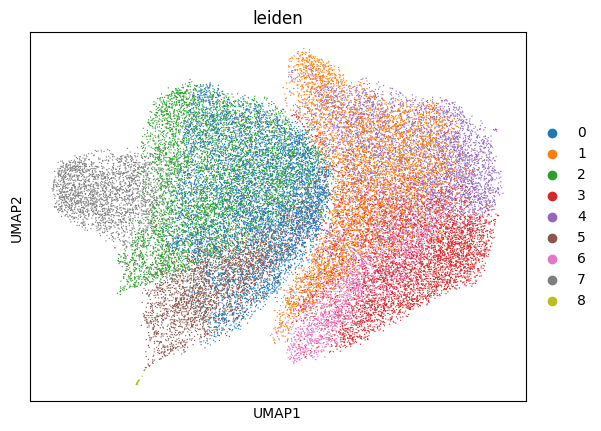

In [51]:
sc.pl.umap(guide_bins, color='leiden')

In [52]:
sc.tl.rank_genes_groups(guide_bins, groupby='leiden', method='t-test')

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scanpy/plotting/_stacked_violin.py:405: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New no

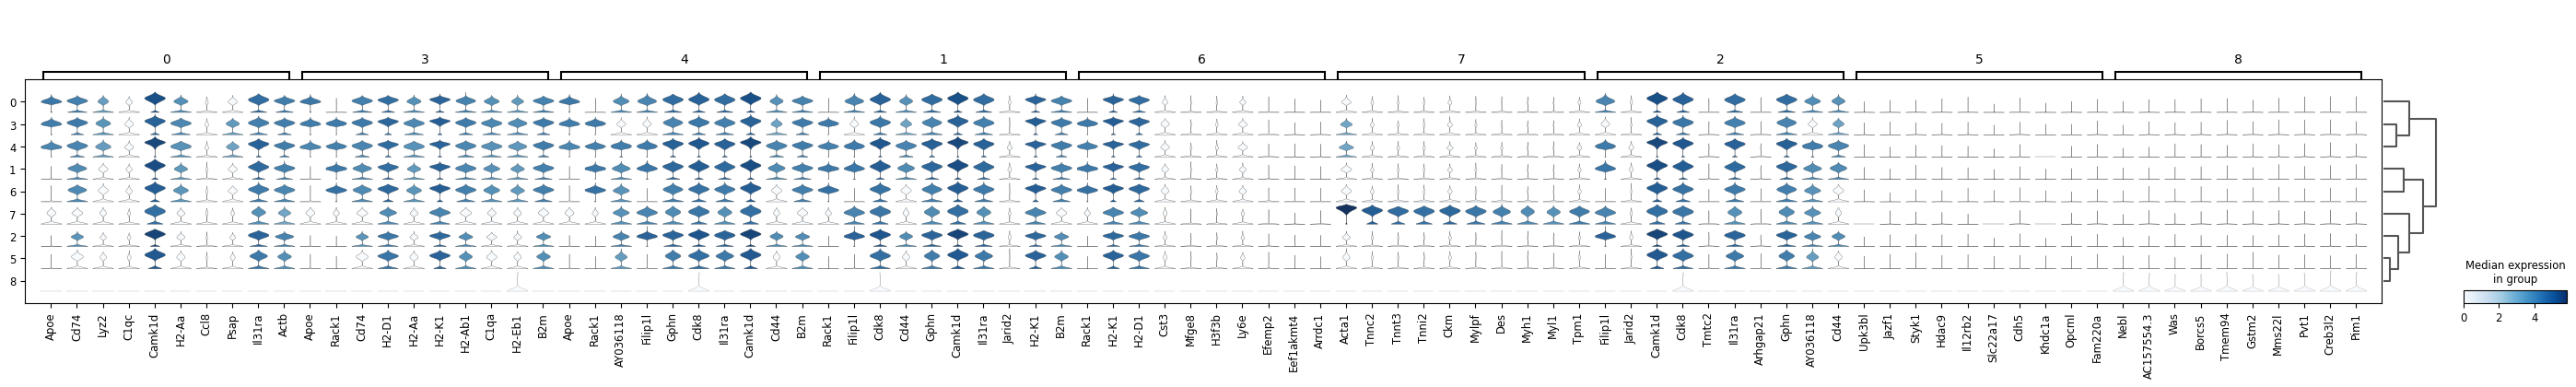

In [54]:
sc.pl.rank_genes_groups_stacked_violin(guide_bins)

In [58]:
g_bins = gdata_[guide_bins.obs_names].copy()

In [71]:
g_bins.obsm['X_umap'] = guide_bins.obsm['X_umap'].copy()

In [63]:
from bin import utils
g_bins = utils.combine_guide_replicates(g_bins)

/home/wpy/stereoseq/20240502-SPACseq/bin/utils.py:88: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [66]:
g_bins.X.argmax(axis=1)

(34319,)

In [67]:
name_dict = pd.DataFrame(g_bins.var_names).to_dict()[0]
g_bins.obs['guide'] = pd.DataFrame(g_bins.X.argmax(axis=1))[0].map(name_dict).tolist()

In [72]:
sc.tl.embedding_density(g_bins, basis='umap', groupby='guide')

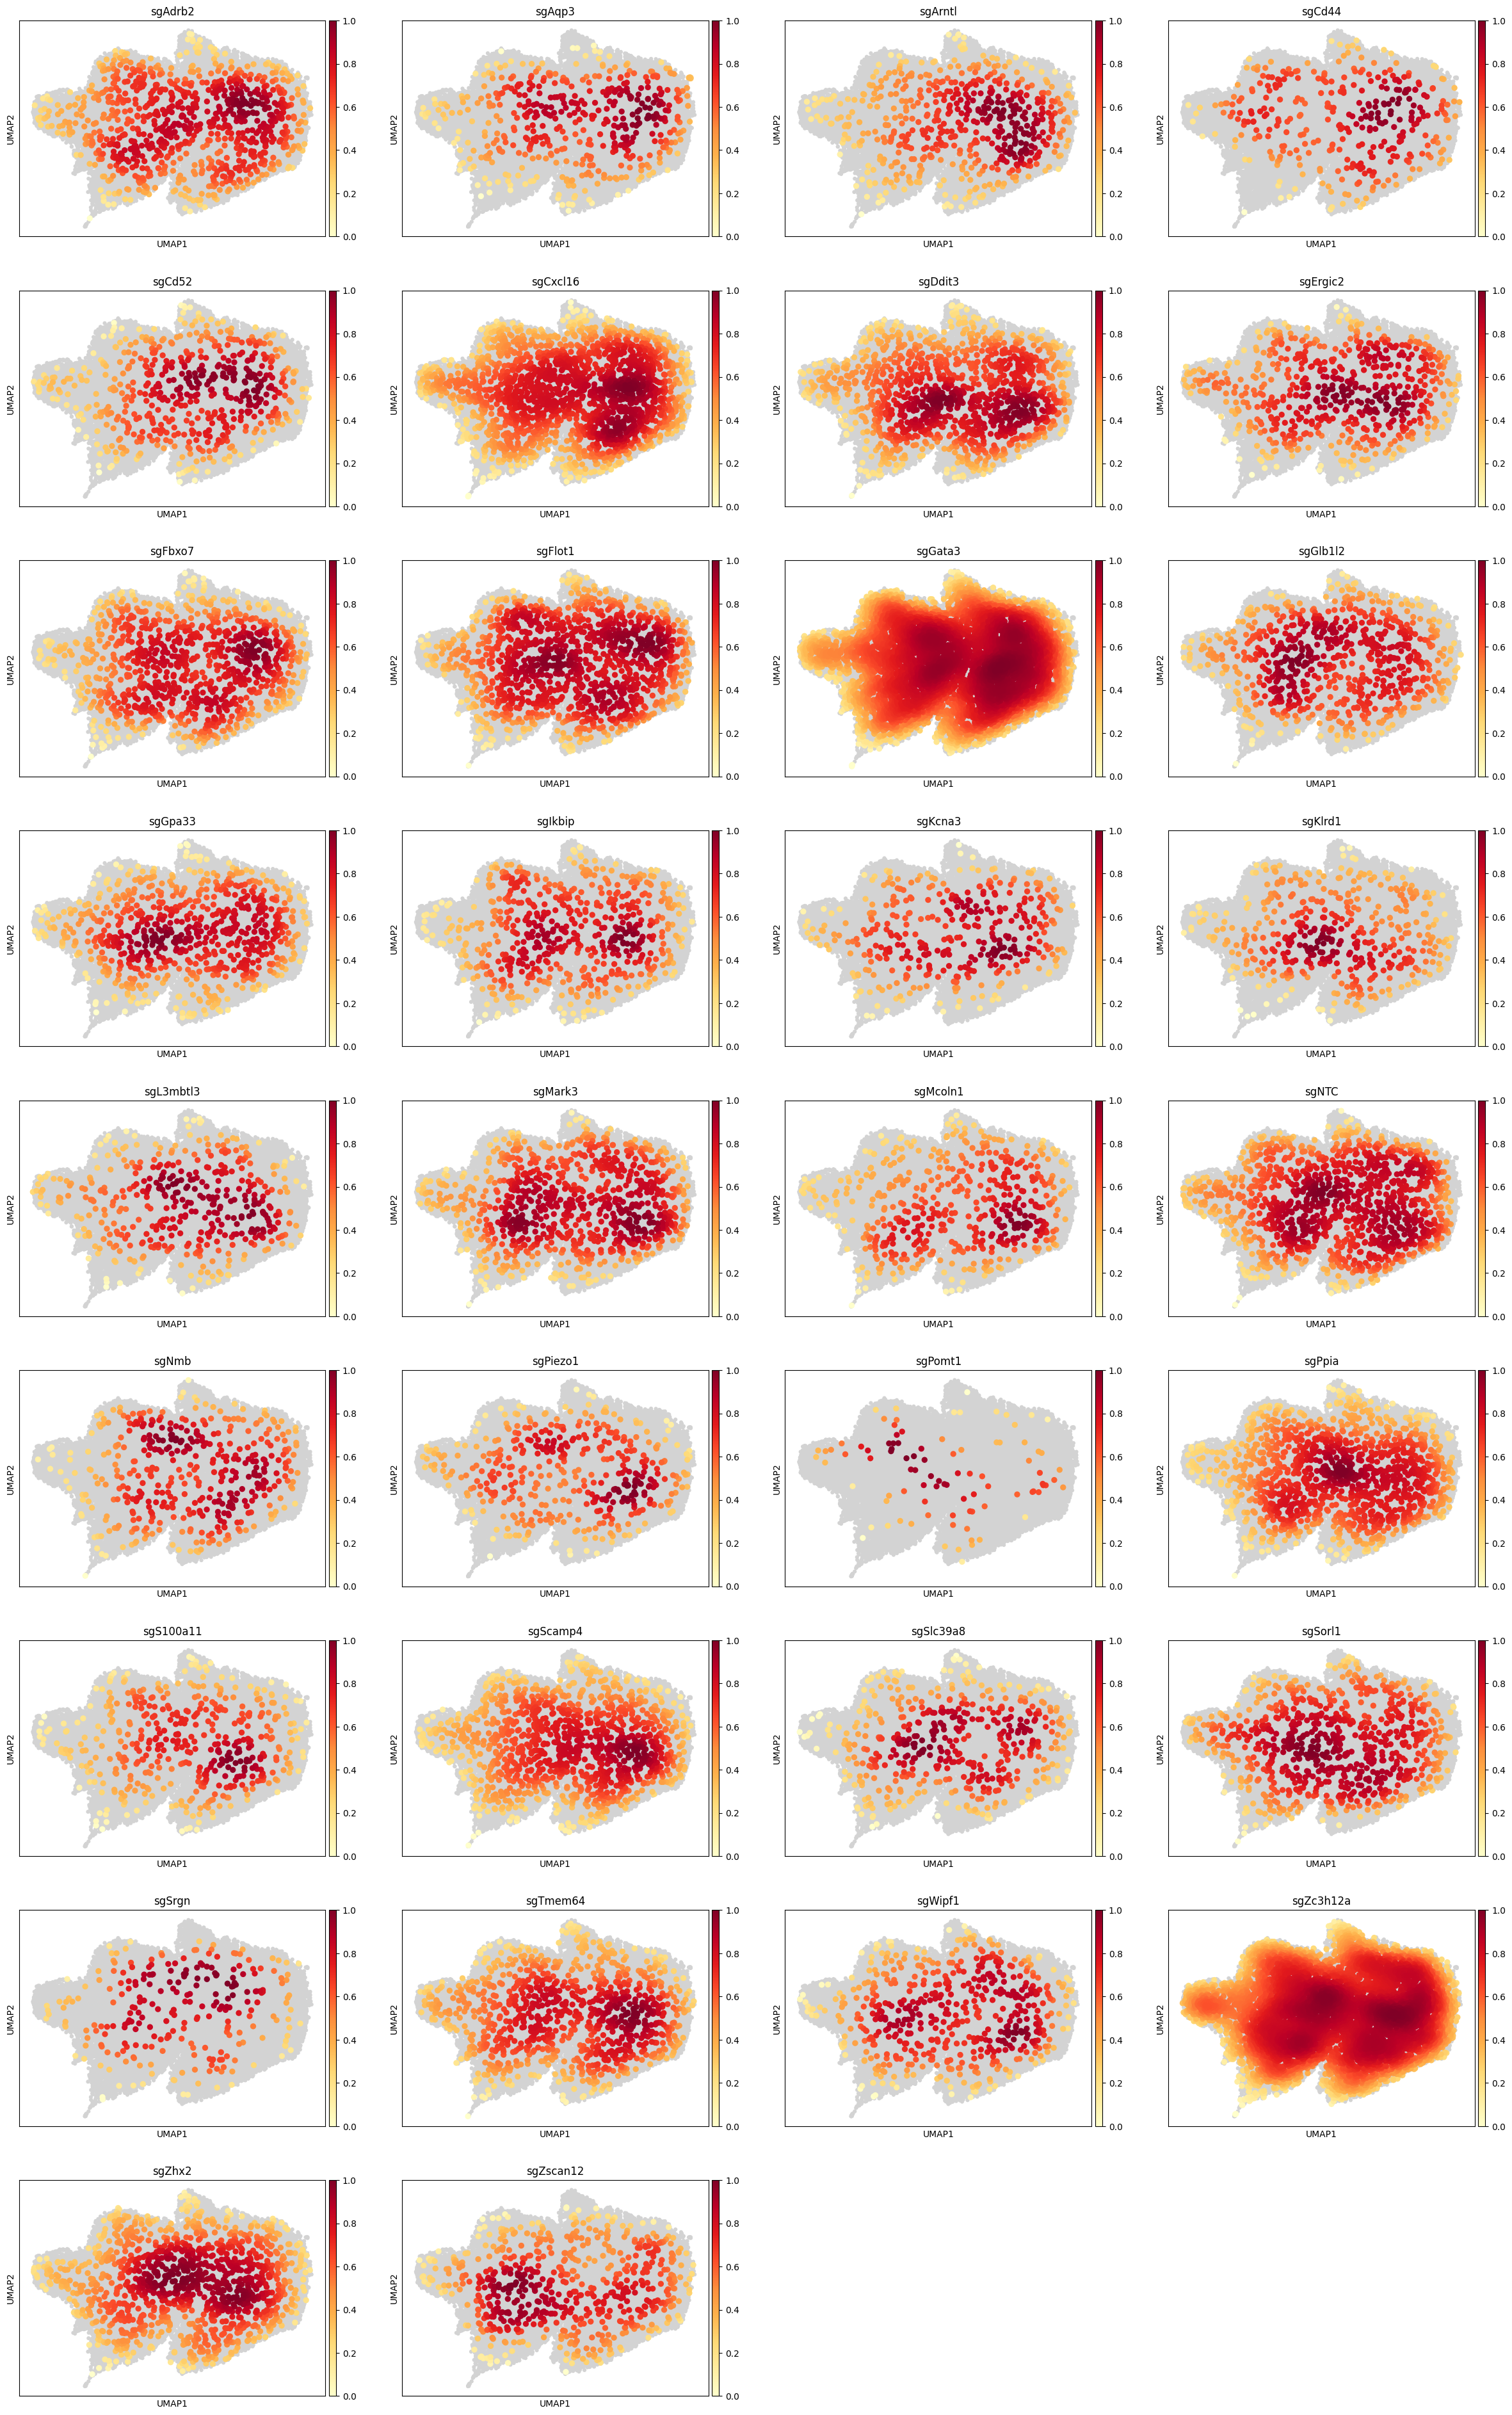

In [74]:
sc.pl.embedding_density(g_bins, basis='umap', key='umap_density_guide')